# Propser Loan Data Analysis
## by Etim Onuk

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
# suppress warnings from final output
import warnings
warnings.simplefilter('ignore')

In [2]:
# Load the Dataset 
loan_df = pd.read_csv('prosperLoanData.csv')

In [3]:
# View the dataset 
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


__Dataset Characteristics__

In [4]:
# Shape of the dataset
loan_df.shape

(113937, 81)

In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
loan_df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### What is the structure of your dataset?

> The dataset consist of 113,937 rows which indicates the loans and 81 columns which indicates the variables or factors associated with the loans. 
<br>
The dataset consist mostly of numeric columns. 

### What is/are the main feature(s) of interest in your dataset?

> Main features that give insights related to borrowers and their loans
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> - __MemberKey__
> - __BorrowerAPR__
> - __BorrowerRate__
> - __LoanStatus__
> - __EstimatedEffectiveYield__
> - __BorrowerState__
> - __ProsperScore__
> - __IncomeVerifiable__
> - __IncomeRange__
> - __Occupation__
> - __StatedMonthlyIncome__
> - __MonthlyLoanPayment__
> - __DebtToIncomeRatio__
> - __EmploymentStatus__
> - __EmploymentStatusDuration__
> - __IsBorrowerHomeowner__
> - __Recommnendations__
> - __MonthlyLoanPayment__
> - __LoanOriginalAmount__
> - __LoanOriginationDate__
> - __Term__
> - __ListingCreationDate__
> - __TotalPropserLoans__

## Univariate Exploration
This Section shows the investigation of distribution of Individual element 
> Subset the DataFrame with our features of interest used in this project

In [7]:
# Subset the Dataframe by selecting features of interest

colz =['MemberKey','EmploymentStatus', 'Occupation','IncomeVerifiable','StatedMonthlyIncome', 'IncomeRange','BorrowerAPR','BorrowerRate','BorrowerState','DebtToIncomeRatio','IsBorrowerHomeowner','CreditScoreRangeLower','CreditScoreRangeUpper','LoanStatus','LoanKey','LoanOriginalAmount','LoanOriginationDate','LoanOriginationQuarter','Term', 'TotalProsperLoans']
loan_sub = loan_df[colz]
loan_sub.head()


,MemberKey,EmploymentStatus,Occupation,IncomeVerifiable,StatedMonthlyIncome,IncomeRange,BorrowerAPR,BorrowerRate,BorrowerState,DebtToIncomeRatio,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,LoanStatus,LoanKey,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,Term,TotalProsperLoans
0,1F3E3376408759268057EDA,Self-employed,Other,True,3083.333333,"$25,000-49,999",0.16516,0.1580,CO,0.17,True,640.0,659.0,Completed,E33A3400205839220442E84,9425,2007-09-12 00:00:00,Q3 2007,36,NaN
1,1D13370546739025387B2F4,Employed,Professional,True,6125.000000,"$50,000-74,999",0.12016,0.0920,CO,0.18,False,680.0,699.0,Current,9E3B37071505919926B1D82,10000,2014-03-03 00:00:00,Q1 2014,36,NaN
2,5F7033715035555618FA612,Not available,Other,True,2083.333333,Not displayed,0.28269,0.2750,GA,0.06,False,480.0,499.0,Completed,6954337960046817851BCB2,3001,2007-01-17 00:00:00,Q1 2007,36,NaN
3,9ADE356069835475068C6D2,Employed,Skilled Labor,True,2875.000000,"$25,000-49,999",0.12528,0.0974,GA,0.15,True,800.0,819.0,Current,A0393664465886295619C51,10000,2012-11-01 00:00:00,Q4 2012,36,NaN
4,36CE356043264555721F06C,Employed,Executive,True,9583.333333,"$100,000+",0.24614,0.2085,MN,0.26,True,680.0,699.0,Current,A180369302188889200689E,15000,2013-09-20 00:00:00,Q3 2013,36,1.0


In [8]:
loan_sub.describe()

,StatedMonthlyIncome,BorrowerAPR,BorrowerRate,DebtToIncomeRatio,CreditScoreRangeLower,CreditScoreRangeUpper,LoanOriginalAmount,Term,TotalProsperLoans
count,1.139370e+05,113912.000000,113937.000000,105383.000000,113346.000000,113346.000000,113937.00000,113937.000000,22085.000000
mean,5.608026e+03,0.218828,0.192764,0.275947,685.567731,704.567731,8337.01385,40.830248,1.421100
std,7.478497e+03,0.080364,0.074818,0.551759,66.458275,66.458275,6245.80058,10.436212,0.764042
min,0.000000e+00,0.006530,0.000000,0.000000,0.000000,19.000000,1000.00000,12.000000,0.000000
25%,3.200333e+03,0.156290,0.134000,0.140000,660.000000,679.000000,4000.00000,36.000000,1.000000
50%,4.666667e+03,0.209760,0.184000,0.220000,680.000000,699.000000,6500.00000,36.000000,1.000000
75%,6.825000e+03,0.283810,0.250000,0.320000,720.000000,739.000000,12000.00000,36.000000,2.000000
max,1.750003e+06,0.512290,0.497500,10.010000,880.000000,899.000000,35000.00000,60.000000,8.000000



### LoanStatus
> This is the current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.


In [9]:
loan_sub['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

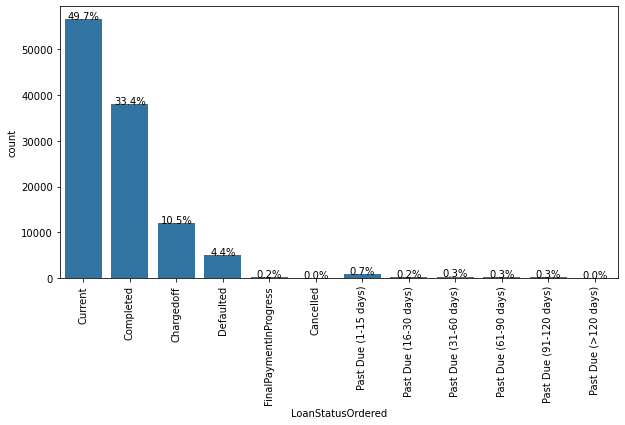

In [10]:
#
#oanstat_order = loan_sub['LoanStatus'].value_counts().index
loanstat_order = ['Current', 'Completed', 'Chargedoff', 'Defaulted', 'FinalPaymentInProgress', 'Cancelled', 'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)']
loan_sub['LoanStatusOrdered'] = pd.Categorical(loan_sub['LoanStatus'], categories=loanstat_order, ordered=True)

loanstat_counts = loan_sub['LoanStatus'].value_counts()
n_loanstat = loan_sub['LoanStatus'].value_counts().sum()
base_color = sb.color_palette()[0]

#
ax = plt.figure(figsize=(10, 5))
ax = sb.countplot(data=loan_sub, x='LoanStatusOrdered', color=base_color)
locs, labels = plt.xticks(rotation=90)

for loc, label in zip(locs, labels):
    count = loanstat_counts[label.get_text()]
    per_string = '{:0.1f}%'.format(100*count/n_loanstat)
    plt.text(loc, count+2, per_string, ha='center', color='black')
    

> From the above Visuals we can see that Majority of the loans fall in the 'Current' category with a bit less in the 'Completed' category. We have a few defaulted and Charged off laons. 

## IncomeRange
> The income range of the borrower at the time the listing was created.
Here, I will find the highest income range borrowers 

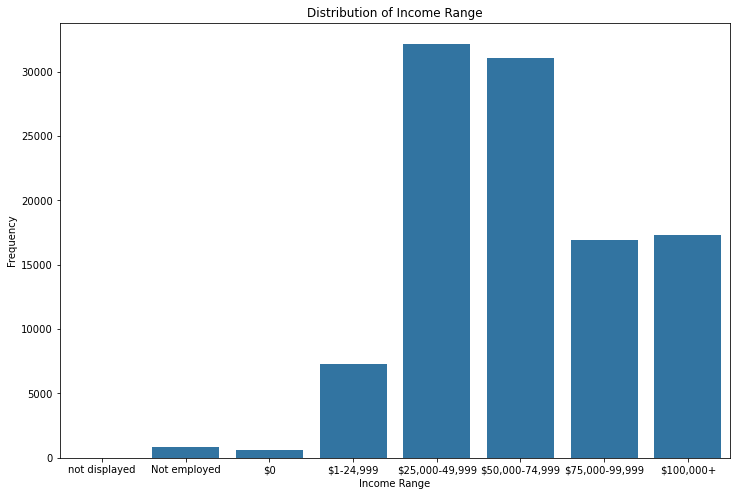

In [11]:
# Create a Barchart that shows the distribution of the borrower's IncomeRange
plt.figure(figsize=[12, 8])
colour= sb.color_palette()[0]
order_type = ['not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
sb.countplot(data=loan_sub, x='IncomeRange', color=colour, order=order_type)
plt.title('Distribution of Income Range')
plt.xlabel('Income Range')
plt.ylabel('Frequency');

> Majority of Borrowers have income between the range of $25,000- $74,999

## Occupation
> The Occupation selected by the Borrower at the time they created the listing.
the Occupation that borrows the most.

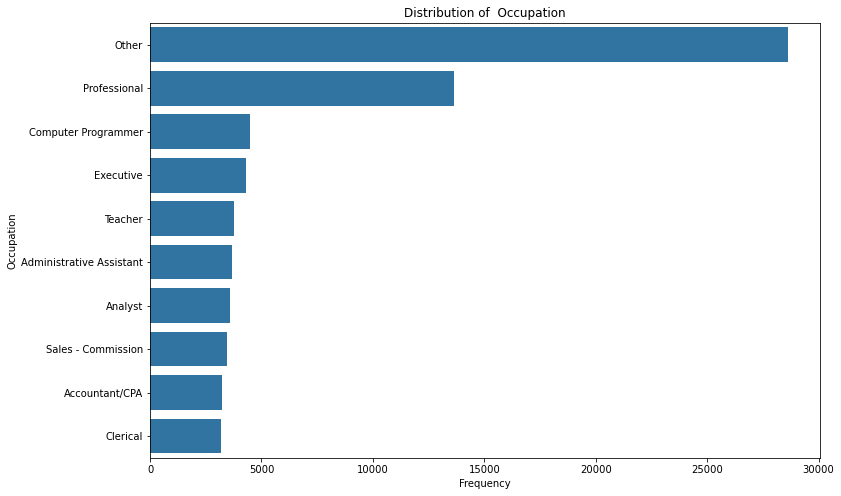

In [12]:
plt.figure(figsize = [12, 8])
colour = sb.color_palette()[0]
order = loan_sub['Occupation'].value_counts().iloc[:10].index
sb.countplot(data= loan_sub, y= 'Occupation', color = colour, order = order)
plt.title("Distribution of  Occupation")
plt.xlabel("Frequency")
plt.ylabel("Occupation");

> Majority of the Borrowers have Occupation outside the prescriped occupation followed by `Professional` with a noticible gap from the rest. 

## BorrowerState
> The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.
The State with the Most Prosper Borrowers 

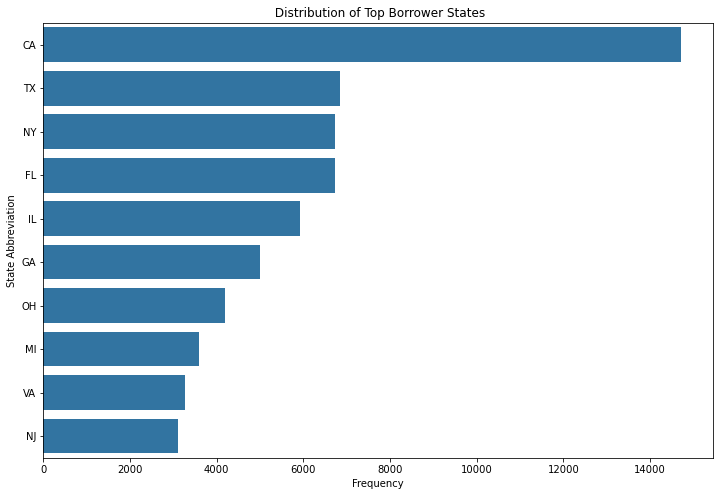

In [13]:
# Distribution of Borrowr's state
plt.figure(figsize=[12, 8])
colour = sb.color_palette()[0]
order = loan_sub['BorrowerState'].value_counts().iloc[:10].index
sb.countplot(data= loan_sub, y= 'BorrowerState', color = colour, order = order)
plt.title(" Distribution of Top Borrower States")
plt.xlabel("Frequency")
plt.ylabel("State Abbreviation");


> `CA` as in California abbreviated.  has the highest distribution of Prosper Borrowers 

## StatedMonthlyIncome
> The monthly income the borrower stated at the time the listing was created.

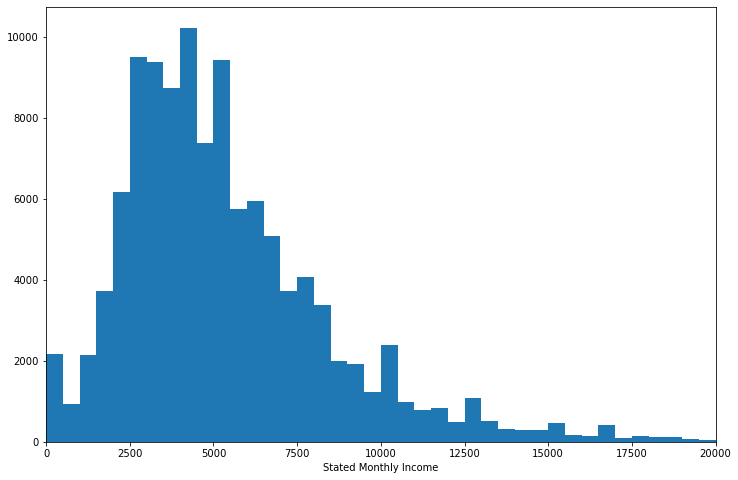

In [14]:
 # Create a Histogram showing the Distribution of the StatedMonthlyIncome
plt.figure(figsize = [12, 8])
bin_edges= np.arange(0, loan_sub['StatedMonthlyIncome'].max()+500, 500)
plt.hist(data= loan_sub, x = 'StatedMonthlyIncome', bins= bin_edges)
plt.xlim(0, 20000)
plt.xlabel('Stated Monthly Income');

> The distribution of Stated monthly income is skewd to the right, with mojorly Stated monthly income that are below 30k

## LoanOriginalAmount
> The originated amount of the loan.

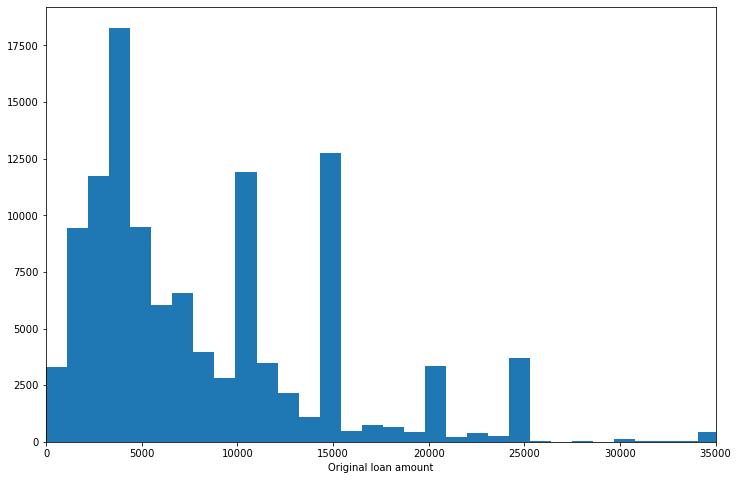

In [15]:
# Create a Histogram showing the Distribution of the LoanOriginalAmount
plt.figure(figsize = [12, 8])
bin_edges= np.arange(0, loan_sub['LoanOriginalAmount'].max()+1100, 1100)
plt.hist(data= loan_sub, x = 'LoanOriginalAmount', bins= bin_edges)
plt.xlim(0, 35000)
plt.xlabel('Original loan amount');

> The Original loan amount distributed has long spikes in frequency at 10,000, 15,000, 20,000, 25,000 dollars 

## DebtToIncomeRatio
> The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).

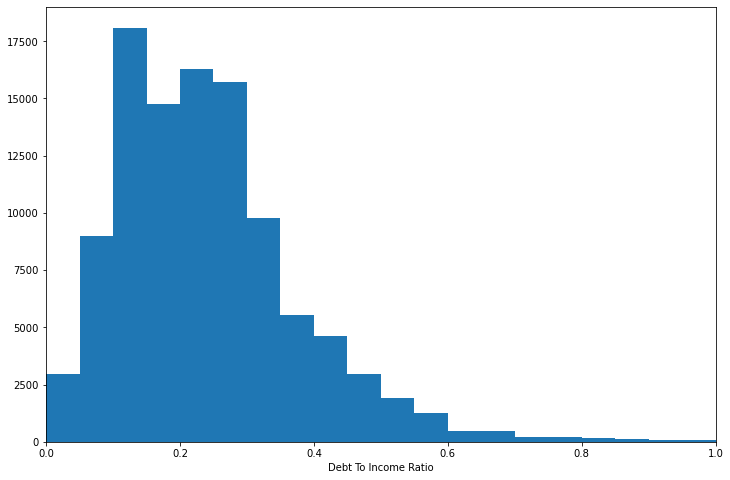

In [16]:
# Create a Histogram to show the distribution of the Borrower's DebtToIncomeRatio 
plt.figure(figsize = [12, 8])
bin= np.arange(0, loan_sub['DebtToIncomeRatio'].max()+0.05, 0.05)
plt.hist(data= loan_sub, x = 'DebtToIncomeRatio', bins= bin)
plt.xlim(0, 1)
plt.xlabel('Debt To Income Ratio');

> The Debt to income ratio is very skewed to the right which shows a positive skewness

## BorrowerRate
> The Borrower's interest rate for this loan. 

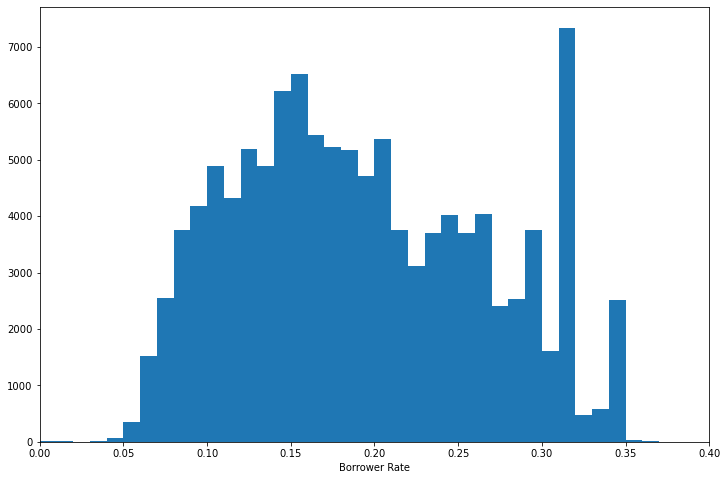

In [17]:
# Create a Histogram showing the distribution of the Borrower's Rate 
plt.figure(figsize = [12, 8])
bin_edges= np.arange(0, loan_sub['BorrowerRate'].max()+0.01, 0.01)
plt.hist(data= loan_sub, x = 'BorrowerRate', bins= bin_edges)
plt.xlim(0, 0.4)
plt.xlabel('Borrower Rate');

> From the Histogram, it can be seen that it wanted a positive skewness but there was a max spike around approx. 0.31-0.33 interest rate on the right.  

## TotalProsperLoans
Number of Prosper loans the borrower at the time they created this listing. This value will be null if the borrower had no prior loans. 

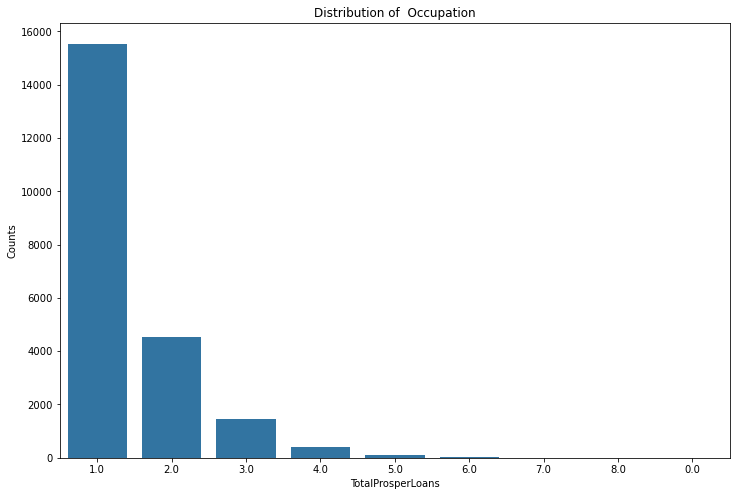

In [18]:
# Create a BarChart showing the distribution of the Total Prosper Loan
plt.figure(figsize = [12, 8])
colour = sb.color_palette()[0]
order = loan_sub['TotalProsperLoans'].value_counts().index
sb.countplot(data= loan_sub, x= 'TotalProsperLoans', color = colour, order = order)
plt.title('Distribution of  Occupation')
plt.xlabel('TotalProsperLoans')
plt.ylabel('Counts');

> It looks like most Borrowers had 1 ProspereLoan before they applied 

## Term
The length of the loan expressed in months.

In [19]:
loan_sub['Term'].value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

From the value_counts(), we can see that they are only 3 values, so we use a PieChart

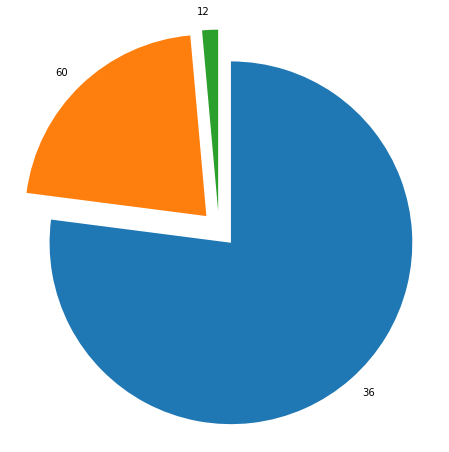

In [20]:
sorted_counts=loan_sub['Term'].value_counts()
myexplode=[0.1, 0.1, 0.1]
plt.figure(figsize=[12, 8])
plt.pie(sorted_counts, labels=sorted_counts.index, startangle=90, counterclock=False, explode=myexplode)

plt.axis('square');

> It can be deduce that 36 months is the larges length of the loan term

## LoanOriginationDate
> The date the loan was originated.

For a thorough analysis, It is best to create a Year and Month column that the Loans were Originated

In [21]:
# Create Month and Year columns from the LoanOriginatedDate
loan_sub['Month'] = pd.DatetimeIndex(loan_sub['LoanOriginationDate']).month
loan_sub['Year'] = pd.DatetimeIndex(loan_sub['LoanOriginationDate']).year

### LoanOriginationDate - Month

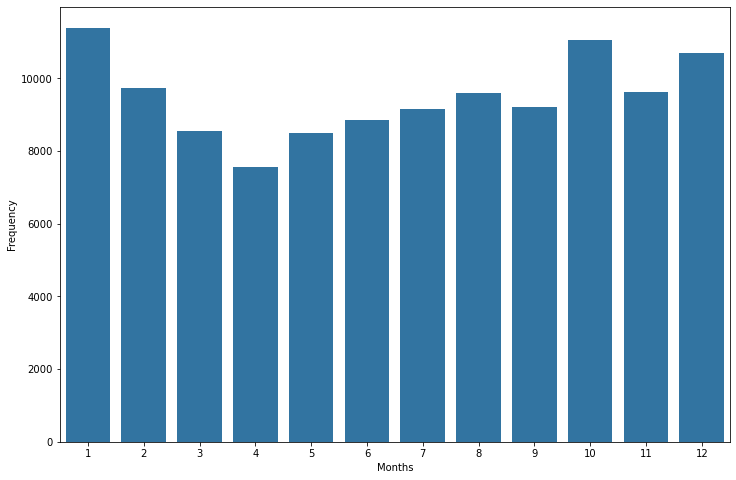

In [22]:
plt.figure(figsize = [12, 8])
color_pal = sb.color_palette()[0]
sb.countplot(data= loan_sub, x= 'Month', color = color_pal)
plt.xlabel('Months')
plt.ylabel('Frequency');

### LoanOriginationDate - Year

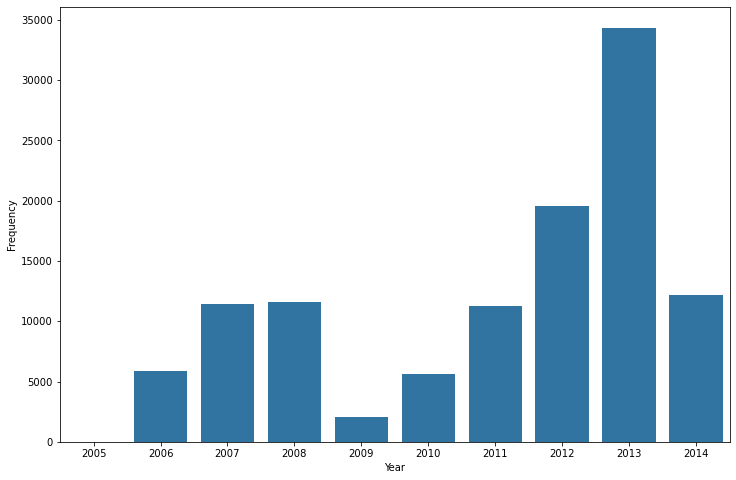

In [23]:
plt.figure(figsize = [12, 8])
color_pal = sb.color_palette()[0]
sb.countplot(data= loan_sub, x= 'Year', color = color_pal)

plt.xlabel("Year")
plt.ylabel("Frequency");

> - It can be notice that People apply for loan mostly at the beginning(January) and Ending of a Year (October, December)with a dip in the mid Year 
> - 2013 was the Year that People took the Most Loans From PropserLoans

## IsBorrowerHomeowner
> A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.

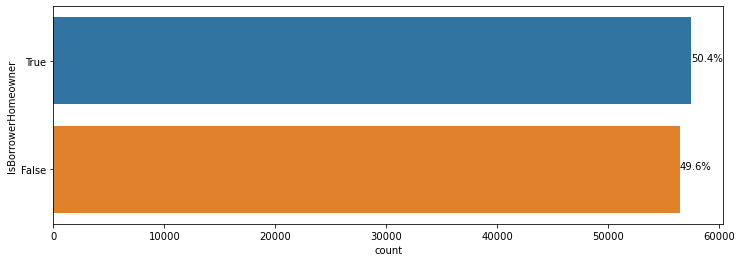

In [24]:
ax = plt.figure(figsize=(12,4))
ax = sb.countplot(data=loan_sub, y='IsBorrowerHomeowner',
                 order=loan_sub.IsBorrowerHomeowner.value_counts().index)
total = len(loan_sub.IsBorrowerHomeowner)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y));

> 50.4% of the Borrowers have Homes while 49.6% dont 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The LoanStatus variable is a Categorical Nominal variable. We concluded from its distribution that the Current, Completed, Chargedoff & Defaulted are the most frequent status in the dataset. The distributions of stated monthly income is highly right screwed and most stated monthly incomes are less than 30k. I also looked at their occupation distribution as well as their income range which mostly ranges from ($)25,000-74,999. Most Loans have a Loan term of 36 months

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The Month and Year was extracted from `Term` and was visualized and it was deduced most loans was taken in 2013 and during the begining and end of a year

## Bivariate Exploration

> In this section, I investigated relationships between pairs of variables in the
data.

In [25]:
loan_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   MemberKey               113937 non-null  object  
 1   EmploymentStatus        111682 non-null  object  
 2   Occupation              110349 non-null  object  
 3   IncomeVerifiable        113937 non-null  bool    
 4   StatedMonthlyIncome     113937 non-null  float64 
 5   IncomeRange             113937 non-null  object  
 6   BorrowerAPR             113912 non-null  float64 
 7   BorrowerRate            113937 non-null  float64 
 8   BorrowerState           108422 non-null  object  
 9   DebtToIncomeRatio       105383 non-null  float64 
 10  IsBorrowerHomeowner     113937 non-null  bool    
 11  CreditScoreRangeLower   113346 non-null  float64 
 12  CreditScoreRangeUpper   113346 non-null  float64 
 13  LoanStatus              113937 non-null  object  
 14  Loan

Change `Term` and its related related variables to object datatype

In [26]:
loan_sub['Term']=loan_sub['Term'].astype(object)
loan_sub['Month']=loan_sub['Month'].astype(object)
loan_sub['Year']=loan_sub['Year'].astype(object)

Categorize the `loan_sub` variables into categoric and numeric variables for pairwise correlation

In [27]:
numeric_vars = [ 'LoanOriginalAmount', 'StatedMonthlyIncome', 'BorrowerRate', 'DebtToIncomeRatio' ]
categoric_vars = ['IncomeRange', 'EmploymentStatus', 'Term', 'Year', 'IsBorrowerHomeowner', 'Occupation', 'Recommendations']


### Correlation between Numeric Variables

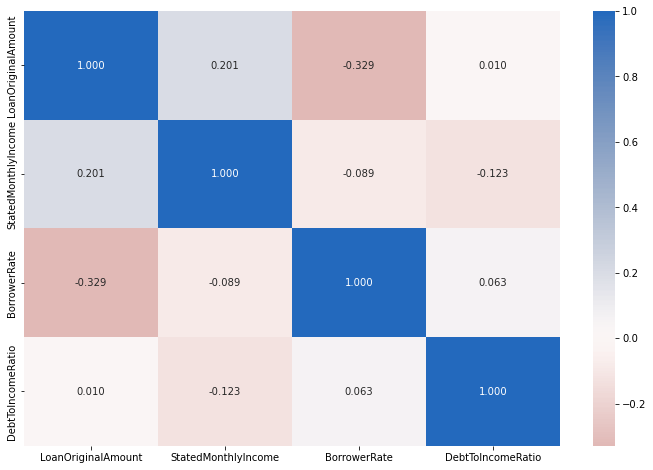

In [28]:
# Correlation using a heatmap plot
plt.figure(figsize = [12, 8])
sb.heatmap(loan_sub[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

> - from above, the different correlation between numeric variable can be seen

loan_sub.shape= (113937, 23)
loan_sub_samp.shape= (700, 23)


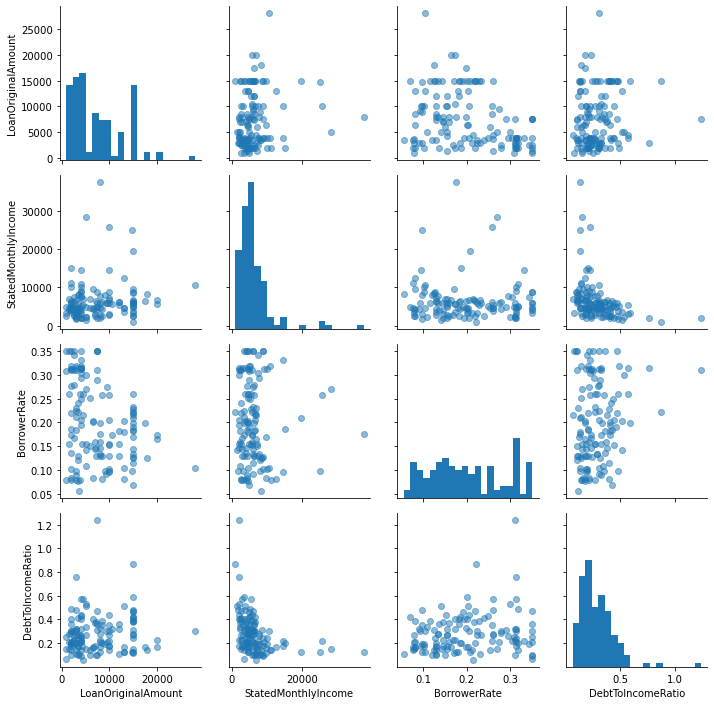

In [29]:
print("loan_sub.shape=",loan_sub.shape)
loan_sub_samp = loan_sub.sample(n=700, replace = False)
print("loan_sub_samp.shape=", loan_sub_samp.shape)

g = sb.PairGrid(data=loan_sub_samp.dropna(), vars=numeric_vars)
r = g.map_diag(plt.hist, bins=20);
r.map_offdiag(plt.scatter , alpha=0.5);
plt.show();

> - The `LoanOriginalAmount` is positively correlated with the `StatedMonthlyIncome`.
> - The `BorrowerRate` is negatively correlated with `LoanOriginalAmount`.
> -

### Correlation between BorrowerRate and OriginalAmount

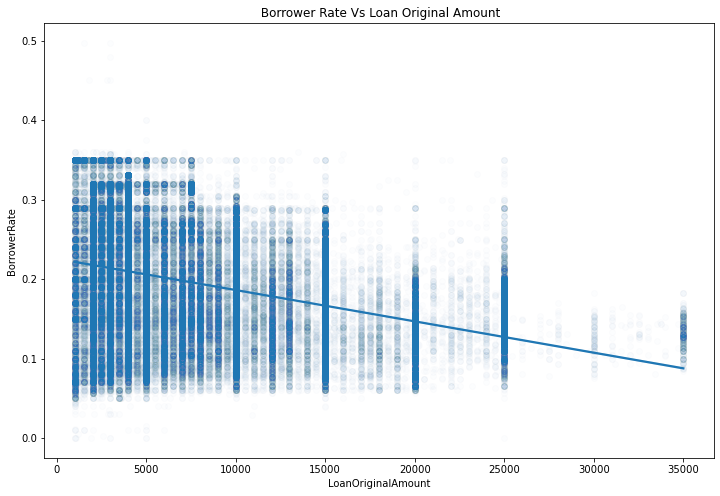

In [30]:
# looking at how borrowerRate and loan original amount are related to one another for all of the data
plt.figure(figsize = [12, 8])
sb.regplot(data=loan_sub, x='LoanOriginalAmount', 
           y='BorrowerRate', 
           scatter_kws={'alpha':0.01})
plt.title(' Borrower Rate Vs Loan Original Amount');

>- This plot shows that at different size of the loan amount, the APR has a large range, but the range of APR decrease with the increase of loan amount. Overall, the borrower APR is negatively correlated with loan amount.

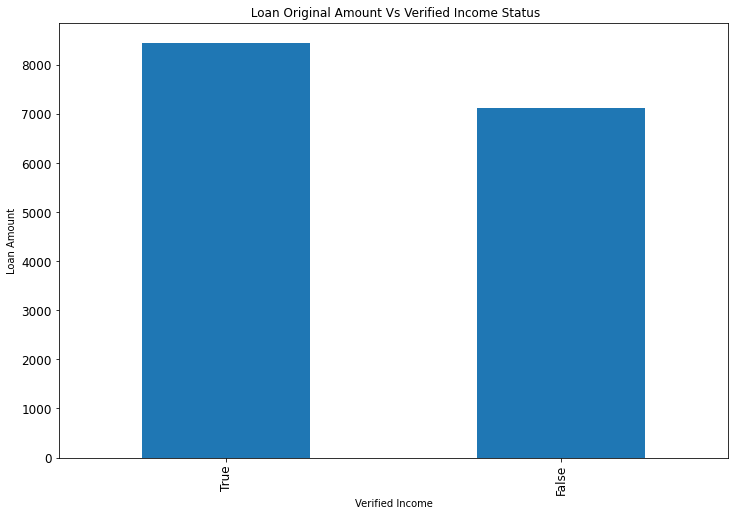

In [31]:
# looking at relationship between borrowers loan original amount and their verifiable income status 
a= loan_sub.groupby('IncomeVerifiable')['LoanOriginalAmount'].mean().sort_values(ascending=False)
plt.figure(figsize = [12, 8])
default_color = sb.color_palette()[0]
a.plot(kind='bar', fontsize=12, color=default_color)
plt.xlabel('Verified Income')
plt.ylabel ('Loan Amount')
plt.title(' Loan Original Amount Vs Verified Income Status');

### How `BorrowerRate`, `StatedMonthlyIncome` and `LoanOriginalAmount` correlate with the `Term`, `Month`, `Year` Categorical variables.

<Figure size 864x864 with 0 Axes>

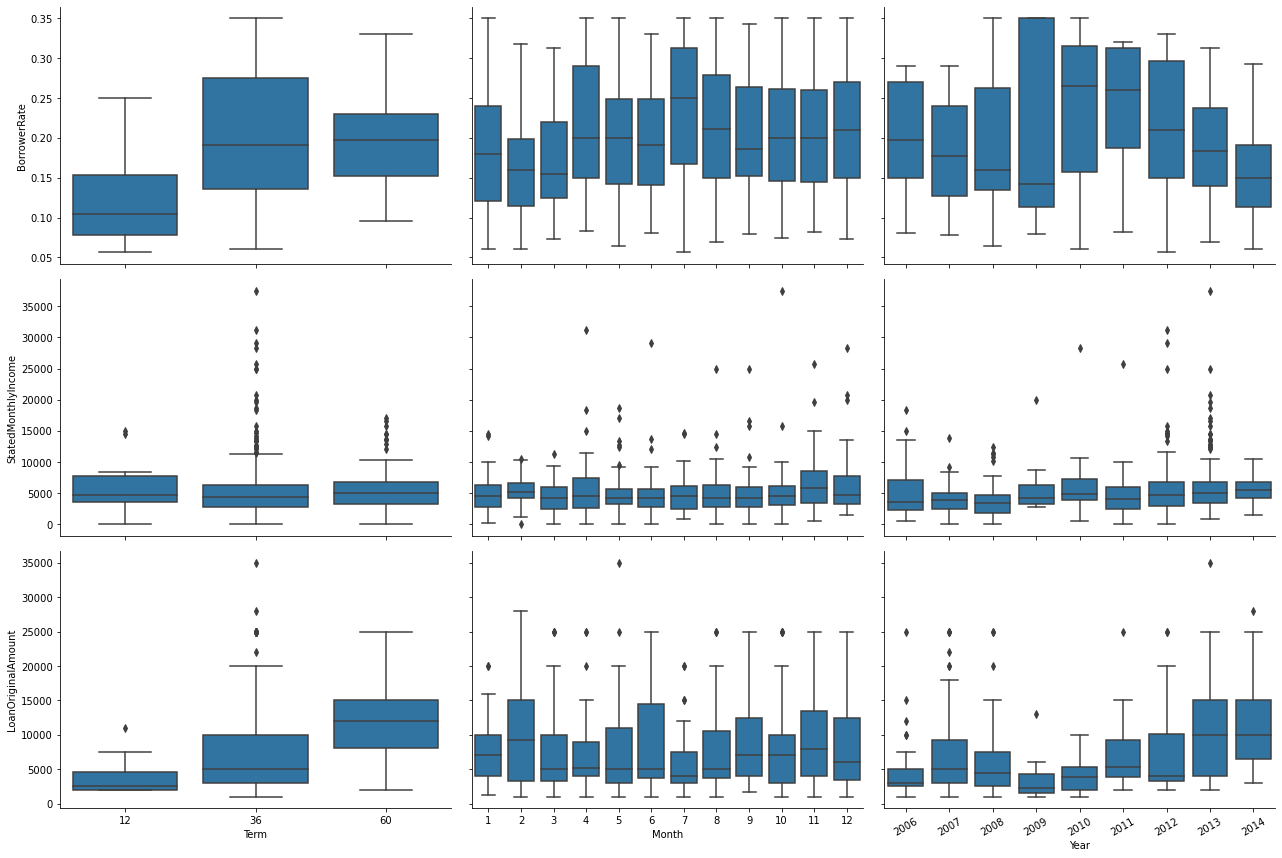

In [32]:
# Plotting matrix of some numeric features against categorical features.
categorical_vars = ['Term', 'Month','Year']

# boxgrid function
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [12, 12])
g = sb.PairGrid(data = loan_sub_samp, y_vars = ['BorrowerRate', 'StatedMonthlyIncome', 'LoanOriginalAmount'], 
                x_vars = categorical_vars, height = 4, aspect = 1.5);
g.map(boxgrid);
plt.xticks(rotation=30);






> - There is a strong positive relationship between term and loan amount (longer the term, the larger the loan
> - I observed that in 2008-2009 there was a large dip in loan origination that went back up in 2013
> -  Employed, self-employed and full time borrowers have more monthly income and loan amount than part-time, retired and not employed borrowers.

###### How `BorrowerRate`, `StatedMonthlyIncome` and `LoanOriginalAmount` correlate with the `IsBorrowerHomeowner`, `IncomeRange`, `EmploymentStatus` Categorical variables.

<Figure size 864x576 with 0 Axes>

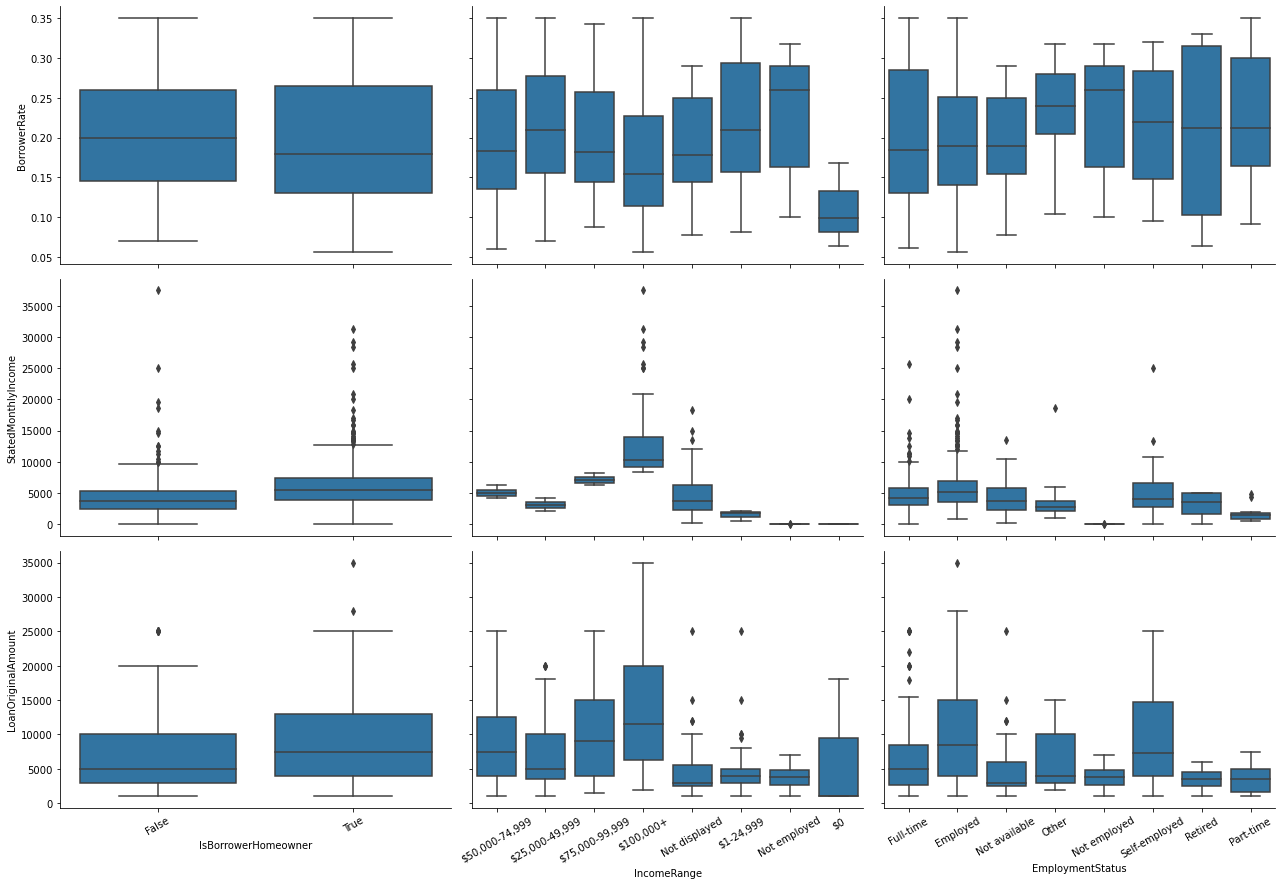

In [33]:
#Let's move on to looking at how borrower Rate, stated monthly income and loan original amount correlate with the categorical variables.
#plotting matrix of numeric features against categorical features.
categorical_vars = [ 'IsBorrowerHomeowner', 'IncomeRange', 'EmploymentStatus']
#def boxgrid function
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    plt.xticks(rotation=30)

plt.figure(figsize = [12, 8])
g = sb.PairGrid(data = loan_sub_samp, y_vars = ['BorrowerRate', 'StatedMonthlyIncome', 'LoanOriginalAmount'], 
                x_vars = categorical_vars, height = 4, aspect = 1.5)
g.map(boxgrid)
plt.xticks(rotation=30);

### Further investigation into relationship between variables

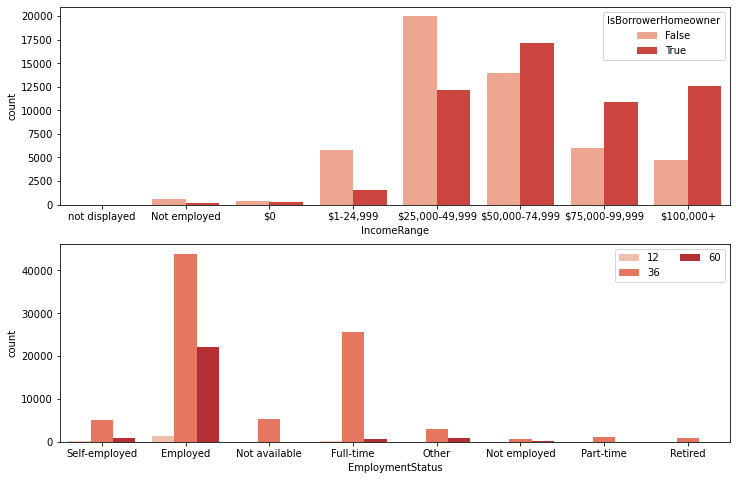

In [34]:
plt.figure(figsize = [12, 8])
order = ['not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999', '$100,000+']
# subplot 1: Income Range vs Is BorrowerHomeowner
plt.subplot(2, 1, 1)
sb.countplot(data = loan_sub, x = 'IncomeRange', hue = 'IsBorrowerHomeowner', order=order, palette = 'Reds')

# subplot 2: employment status vs. term
ax = plt.subplot(2, 1, 2)
sb.countplot(data = loan_sub, x = 'EmploymentStatus', hue = 'Term', palette = 'Reds')

ax.legend(loc = 1, ncol = 2); 

- Borrowers with income range from ($)50,000-100,000+ are mostly homeowners
- Borrowers with full time employment status tend to take loans with term duration of 12 months
- Employed borrowers tend to take loans of term duration as 36 months

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The borrower APR is negatively associated with the loan original amount, which mean the more the loan amount, the lower the APR. Also, it shows that at different size of the loan amount, the Rate has a large range, but the range of interest Rate decrease with the increase of loan amount. The loan original amount is positively correlated with the stated monthly income, that is, the higher their stated monthly income, the higher the loan amount borrowed.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> - The loan original amount is positively correlated with the stated monthly income, it makes sense since borrowers with more monthly income could loan more money
> - Borrowers with income ranging from ($)50,000-100,000+ are majorly homeowners
> - Borrowers with full time employment status tend to take loans with term duration of 12 months

## Multivariate Exploration

> Creates plots of three or more variables to investigate your data even
further. 

### Further investigation to show the `Term` effect on relationship of `BorrowerRate` and `LoanOriginalAmount`

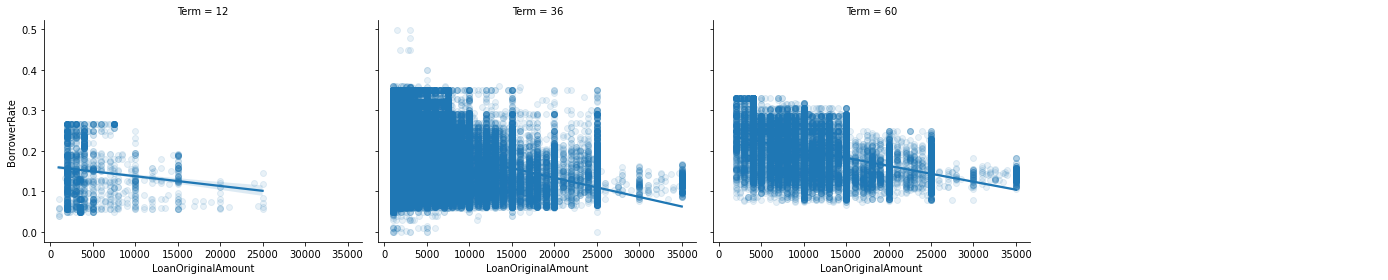

In [35]:
# Term effect on relationship of BorrowerRate and LoanOriginalAmount
g=sb.FacetGrid(data=loan_sub, aspect=1.2, height=4, col='Term', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerRate', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

> Terms doesnt really affect the relationship

### Further investigation to show the effect `IncomeVerifiable` has on the relationship between `LoanOriginalAmount` and `IncomeRange`

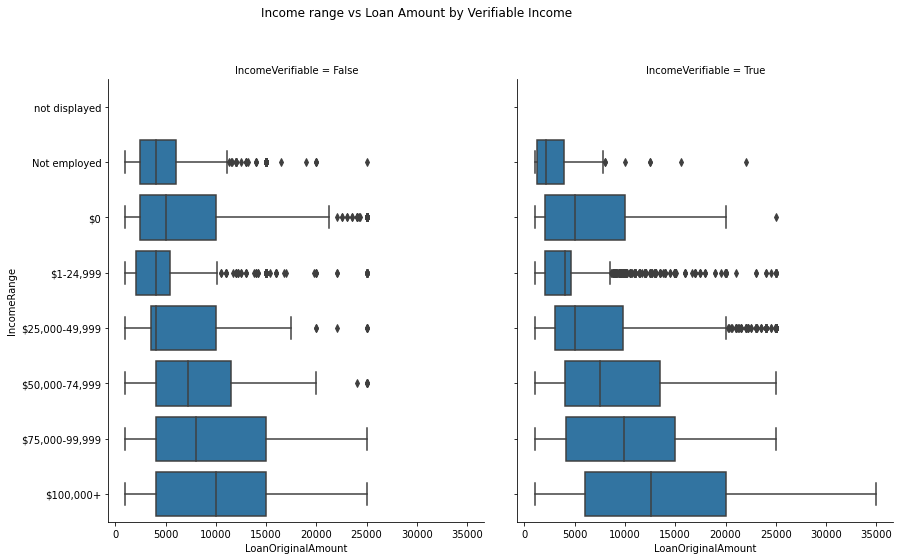

In [36]:
# IncomeVerifiable effect on the relationship LoanOriginalAmount and IncomeRange
order = ['not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999', '$100,000+']
box= sb.FacetGrid(data= loan_sub, col = 'IncomeVerifiable', height = 4)
box.map(sb.boxplot, 'LoanOriginalAmount', 'IncomeRange', order = order)
plt.suptitle('Income range vs Loan Amount by Verifiable Income', y = 1.04)
box.fig.set_size_inches(14,8);

> - People who earn ($)100,000+ and have verified their income tend to get larger loan original amount than those whose income are not verifiable. The borrowers with verified incomes tend to get higher loan amounts

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Term does'nt really seem to have effect on the relationship between borrower rate and loan original amount

### Were there any interesting or surprising interactions between features?

> People who earn ($)100,000+ and have verified their income tend to get larger loan original amount than those whose income are not verifiable. The borrowers with verified incomes tend to get higher loan amounts

## Conclusions
> For this exploratory analysis, my main interest was to analyze the borrowers information for relationship insights with the loans they took.

> Exploring the distribution of uni variables of interest, one of the insightful information discovered was that CA State has the highest borrowers. Looking at Borrower's employment status, I discovered majority of the borrowers have either employed or fulltime employment status. Investigating further into their source of income, I discovered that their income mostly ranges from 25,000-74,999 and their monthly income distribution is skewed to the right and they are usually less than 30k. Their income ratio is right skewed as well. Looking at the loan terms, they were either for a period of 12, 36 or 60 months. Most of the loans have a loan term of 36 months. Investigating further, I extracted the months and years of the loans from the loan original date and I discovered alot of loans were taken in 2013 and I think this is an important insight to investigate further.

> Investigating further to observe the relationships between 2 variables each of the data, I discovered that the borrower interest Rate is negatively correlated with the loan original amount, which mean the more the loan amount, the lower the Borrower Rate. It also shows that at different size of the loan amount, the Rate has a large range, but the range of interest Rate decrease with the increase of loan amount. looking at the monthly income of borrowers, I discovered that the loan original amount is positively correlated with the stated monthly income. That is, the higher their stated monthly income, the higher the loan amount borrowed. Also, Borrowers with verified income tend to have a higher average loan amount than borrowers without verified income. Borrowers with income ranging from ($)50,000-100,000+ are majorly homeowners. Borrowers who are employed and fulltime on average take out larger loans than other groups. There is a strong positive relationship between term and loan amount (longer the term, the larger the loan). Also, Employed borrowers tend to take loans of term duration as 36months while Borrowers with full time employment status tend to take loans with term duration of 12months. Looking at loan origination over years, I observed that in 2008-2009 there was a large dip in loan origination that went back up in 2013.

> Investigating further using multiple variables, I realized that loan Term did'nt really seem to have effect on the relationship between borrower rate and loan original amount. Also checked if verified income has an effect on the loan original amount and relationship with income range. Then I discovered that People who earn ($)100,000+ and have verified their income tend to get larger loan original


